In [59]:
#Imports 
import pickle
import datetime

import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [2]:
print('Running other notebooks: Preparing data..\r', end = '')
%run "Load and prepare data.ipynb"
print('Running other notebooks: Defining particle tracking class..', end = '')
%run "Define particle tracking class.ipynb"
print('  ..done.')

Running other notebooks: Defining particle tracking class..  ..done.


### Load sea ice trajectory
DL from https://data.meereisportal.de/

Maps for reference:


##### B1: *2020P175*

- From near NP to Greenland coast (ice-to-ice) 
- https://data.meereisportal.de/maps/buoys/P/2020P175_map.png


In [17]:
b1_buoy = '2020P175'
b1_fn_globkey = f'data/{b1_buoy}_data/*_proc.csv'
b1_fn = glob.glob(b1_fn_globkey)[0]
print(b1_fn)

data/2020P175_data/2020P175_300534061904630_proc.csv


In [18]:
b1 = pd.read_csv(fn)

In [33]:
date2num(pd.to_datetime(b.time.iloc[-1]))

18746.375405092593

In [31]:
datetime.str(b.time.iloc[-1])

TypeError: 'str' object cannot be interpreted as an integer

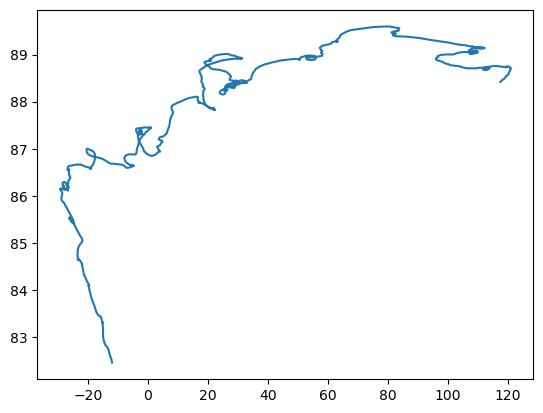

In [19]:
fig, ax = plt.subplots()
ax.plot(b['longitude (deg)'], b['latitude (deg)'])

#### Backtrack

In [51]:
end_date = pd.to_datetime(b.time.iloc[-1])

In [52]:
import warnings
warnings.simplefilter("ignore")

In [53]:

IC_dict_b1 = {'D':D, 
              'lat0':b['latitude (deg)'].iloc[-1], 
              'lon0':b['longitude (deg)'].iloc[-1], 
           'time0':end_date, 
           'MASK':MASK, 'interp_method':'linear', 'end_criteria':'ABC' }
    
# Set up object, compute the trajectory, and save to TRAJS
P_b1 = ice_particle(IC_dict_b1)
P_b1.backtrack()


Setting up object ..
 ..done.


KeyboardInterrupt: 

In [60]:
crs = ccrs.Stereographic(central_latitude=80.0, central_longitude=0.0, false_easting=0.0, 
                          false_northing=0.0, true_scale_latitude=None, globe=None)

In [74]:
P_b1.time0

cftime.DatetimeJulian(2021, 4, 29, 0, 0, 0, 0, has_year_zero=False)

In [75]:
num2date(date2num(P_b1.time0)).strftime('%d %b %y')

'29 Apr 21'

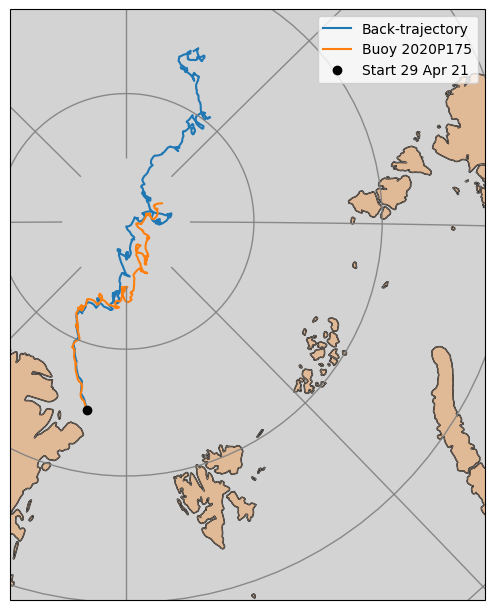

In [77]:
plt.close('all')
fig = plt.figure(figsize = [6.45, 7.67])
ax = fig.add_subplot(111, projection=crs)

ax.coastlines()
ax.add_feature(cfeature.LAND, color = 'tab:orange', alpha = 0.3)
ax.add_feature(cfeature.COASTLINE, color = 'gray', lw = 0.5)
ax.set_extent([-45, 125, 60, 60])

ax.set_xlim(-511665, 1579472)
ax.set_ylim(-546114, 2055926)
ax.set_facecolor('lightgray')



Plat_b1, Plon_b1 = P_b1.ease2_to_latlon.transform(P_b1.x, P_b1.y)

datestr = num2date(date2num(P_b1.time0)).strftime('%d %b %y')

ax.plot(Plon_b1, Plat_b1, transform = ccrs.PlateCarree(), label = 'Back-trajectory')
ax.plot(b['longitude (deg)'], b['latitude (deg)'], transform = ccrs.PlateCarree(), label = 'Buoy %s'%buoy)
ax.plot(Plon_b1[0], Plat_b1[0], 'ok', transform = ccrs.PlateCarree(), label = 'Start %s'%datestr)

gls = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), lw=1, color="gray",
        y_inline=True, xlocs=range(-180,180,45), ylocs=range(0,90,5), alpha = 0.9,  ylim=87.5, )
ax.legend()